In [50]:
import os

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

In [51]:
PROJECT_DIR = r"E:\corals"
DATA_DIR = "data"

In [52]:
def get_data(name):
	file_name = f"{name}.csv"
	file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
	return pd.read_csv(file_path)

In [53]:
coral = get_data("coral")
coral.head()

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.163,-82.5260,Atlantic,nd,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5,0,0,0.74,7.25,0.18,2005-09-15,nd,nd,nd
1,3467,10324754,Donner,-17.575,-149.7833,Pacific,nd,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4,0,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,nd
2,1794,10323866,Donner,18.369,-64.5640,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7,0,0,1.04,11.66,0.26,2006-01-15,nd,nd,nd
3,8647,10328028,Donner,17.760,-64.5680,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4,0,0,0.75,5.64,0.2,2006-04-15,nd,nd,nd
4,8648,10328029,Donner,17.769,-64.5830,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5,0,0,0.92,6.89,0.25,2006-04-15,nd,nd,nd


In [5]:
coral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                41361 non-null  int64  
 1   Sample_ID                              41361 non-null  int64  
 2   Data_Source                            41361 non-null  object 
 3   Latitude_Degrees                       41361 non-null  float64
 4   Longitude_Degrees                      41361 non-null  float64
 5   Ocean_Name                             41361 non-null  object 
 6   Reef_ID                                41361 non-null  object 
 7   Realm_Name                             41361 non-null  object 
 8   Ecoregion_Name                         41361 non-null  object 
 9   Country_Name                           41361 non-null  object 
 10  State_Island_Province_Name             41361 non-null  object 
 11  Ci

In [54]:
coral.duplicated().sum()

0

In [55]:
# df = df[df['SSTA' > 0]]
coral.shape

(41361, 62)

In [56]:
# f['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
coral['SSTA'] = pd.to_numeric(coral['SSTA'], errors = 'coerce')

In [57]:
coral = coral[coral['SSTA']>0]

In [58]:
coral.shape

(25833, 62)

In [59]:
coral.replace('nd',np.nan, inplace = True)

In [60]:
coral.isnull().sum()

Site_ID                   0
Sample_ID                 0
Data_Source               0
Latitude_Degrees          0
Longitude_Degrees         0
                      ...  
TSA_DHWMean               0
Date                      0
Site_Comments         24197
Sample_Comments       23672
Bleaching_Comments    23822
Length: 62, dtype: int64

In [61]:
column_having_null = coral.columns[coral.isnull().any()]

In [62]:
column_having_null

Index(['Reef_ID', 'Ecoregion_Name', 'Country_Name',
       'State_Island_Province_Name', 'City_Town_Name', 'Site_Name', 'Depth_m',
       'Substrate_Name', 'Percent_Cover', 'Bleaching_Level',
       'Percent_Bleaching', 'SSTA_Minimum', 'Site_Comments', 'Sample_Comments',
       'Bleaching_Comments'],
      dtype='object')

In [63]:
coral.drop(columns=['Site_ID','Sample_ID',"Data_Source","Ocean_Name","Reef_ID","Realm_Name","Ecoregion_Name","Country_Name","State_Island_Province_Name","City_Town_Name","Site_Name","Distance_to_Shore","Exposure","Turbidity","Cyclone_Frequency","Date_Day","Date_Month","Substrate_Name","Percent_Cover","Bleaching_Level","Date","Site_Comments","Sample_Comments","Bleaching_Comments"],inplace = True)

In [64]:
coral[coral.select_dtypes(include=['object']).columns] = coral.select_dtypes(include=['object']).apply(pd.to_numeric, errors='ignore')

In [65]:
coral.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25833 entries, 1 to 41358
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Latitude_Degrees                       25833 non-null  float64
 1   Longitude_Degrees                      25833 non-null  float64
 2   Date_Year                              25833 non-null  int64  
 3   Depth_m                                24438 non-null  float64
 4   Percent_Bleaching                      21998 non-null  float64
 5   ClimSST                                25833 non-null  float64
 6   Temperature_Kelvin                     25833 non-null  float64
 7   Temperature_Mean                       25833 non-null  float64
 8   Temperature_Minimum                    25833 non-null  float64
 9   Temperature_Maximum                    25833 non-null  float64
 10  Temperature_Kelvin_Standard_Deviation  25833 non-null  float64
 11  Windspe

In [66]:
coral = coral.fillna(coral.median())

In [67]:
coral.shape

(25833, 38)

In [68]:
coral.isnull().sum()

Latitude_Degrees                         0
Longitude_Degrees                        0
Date_Year                                0
Depth_m                                  0
Percent_Bleaching                        0
ClimSST                                  0
Temperature_Kelvin                       0
Temperature_Mean                         0
Temperature_Minimum                      0
Temperature_Maximum                      0
Temperature_Kelvin_Standard_Deviation    0
Windspeed                                0
SSTA                                     0
SSTA_Standard_Deviation                  0
SSTA_Mean                                0
SSTA_Minimum                             0
SSTA_Maximum                             0
SSTA_Frequency                           0
SSTA_Frequency_Standard_Deviation        0
SSTA_FrequencyMax                        0
SSTA_FrequencyMean                       0
SSTA_DHW                                 0
SSTA_DHW_Standard_Deviation              0
SSTA_DHWMax

In [69]:
coral_matrix = coral.corr()

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

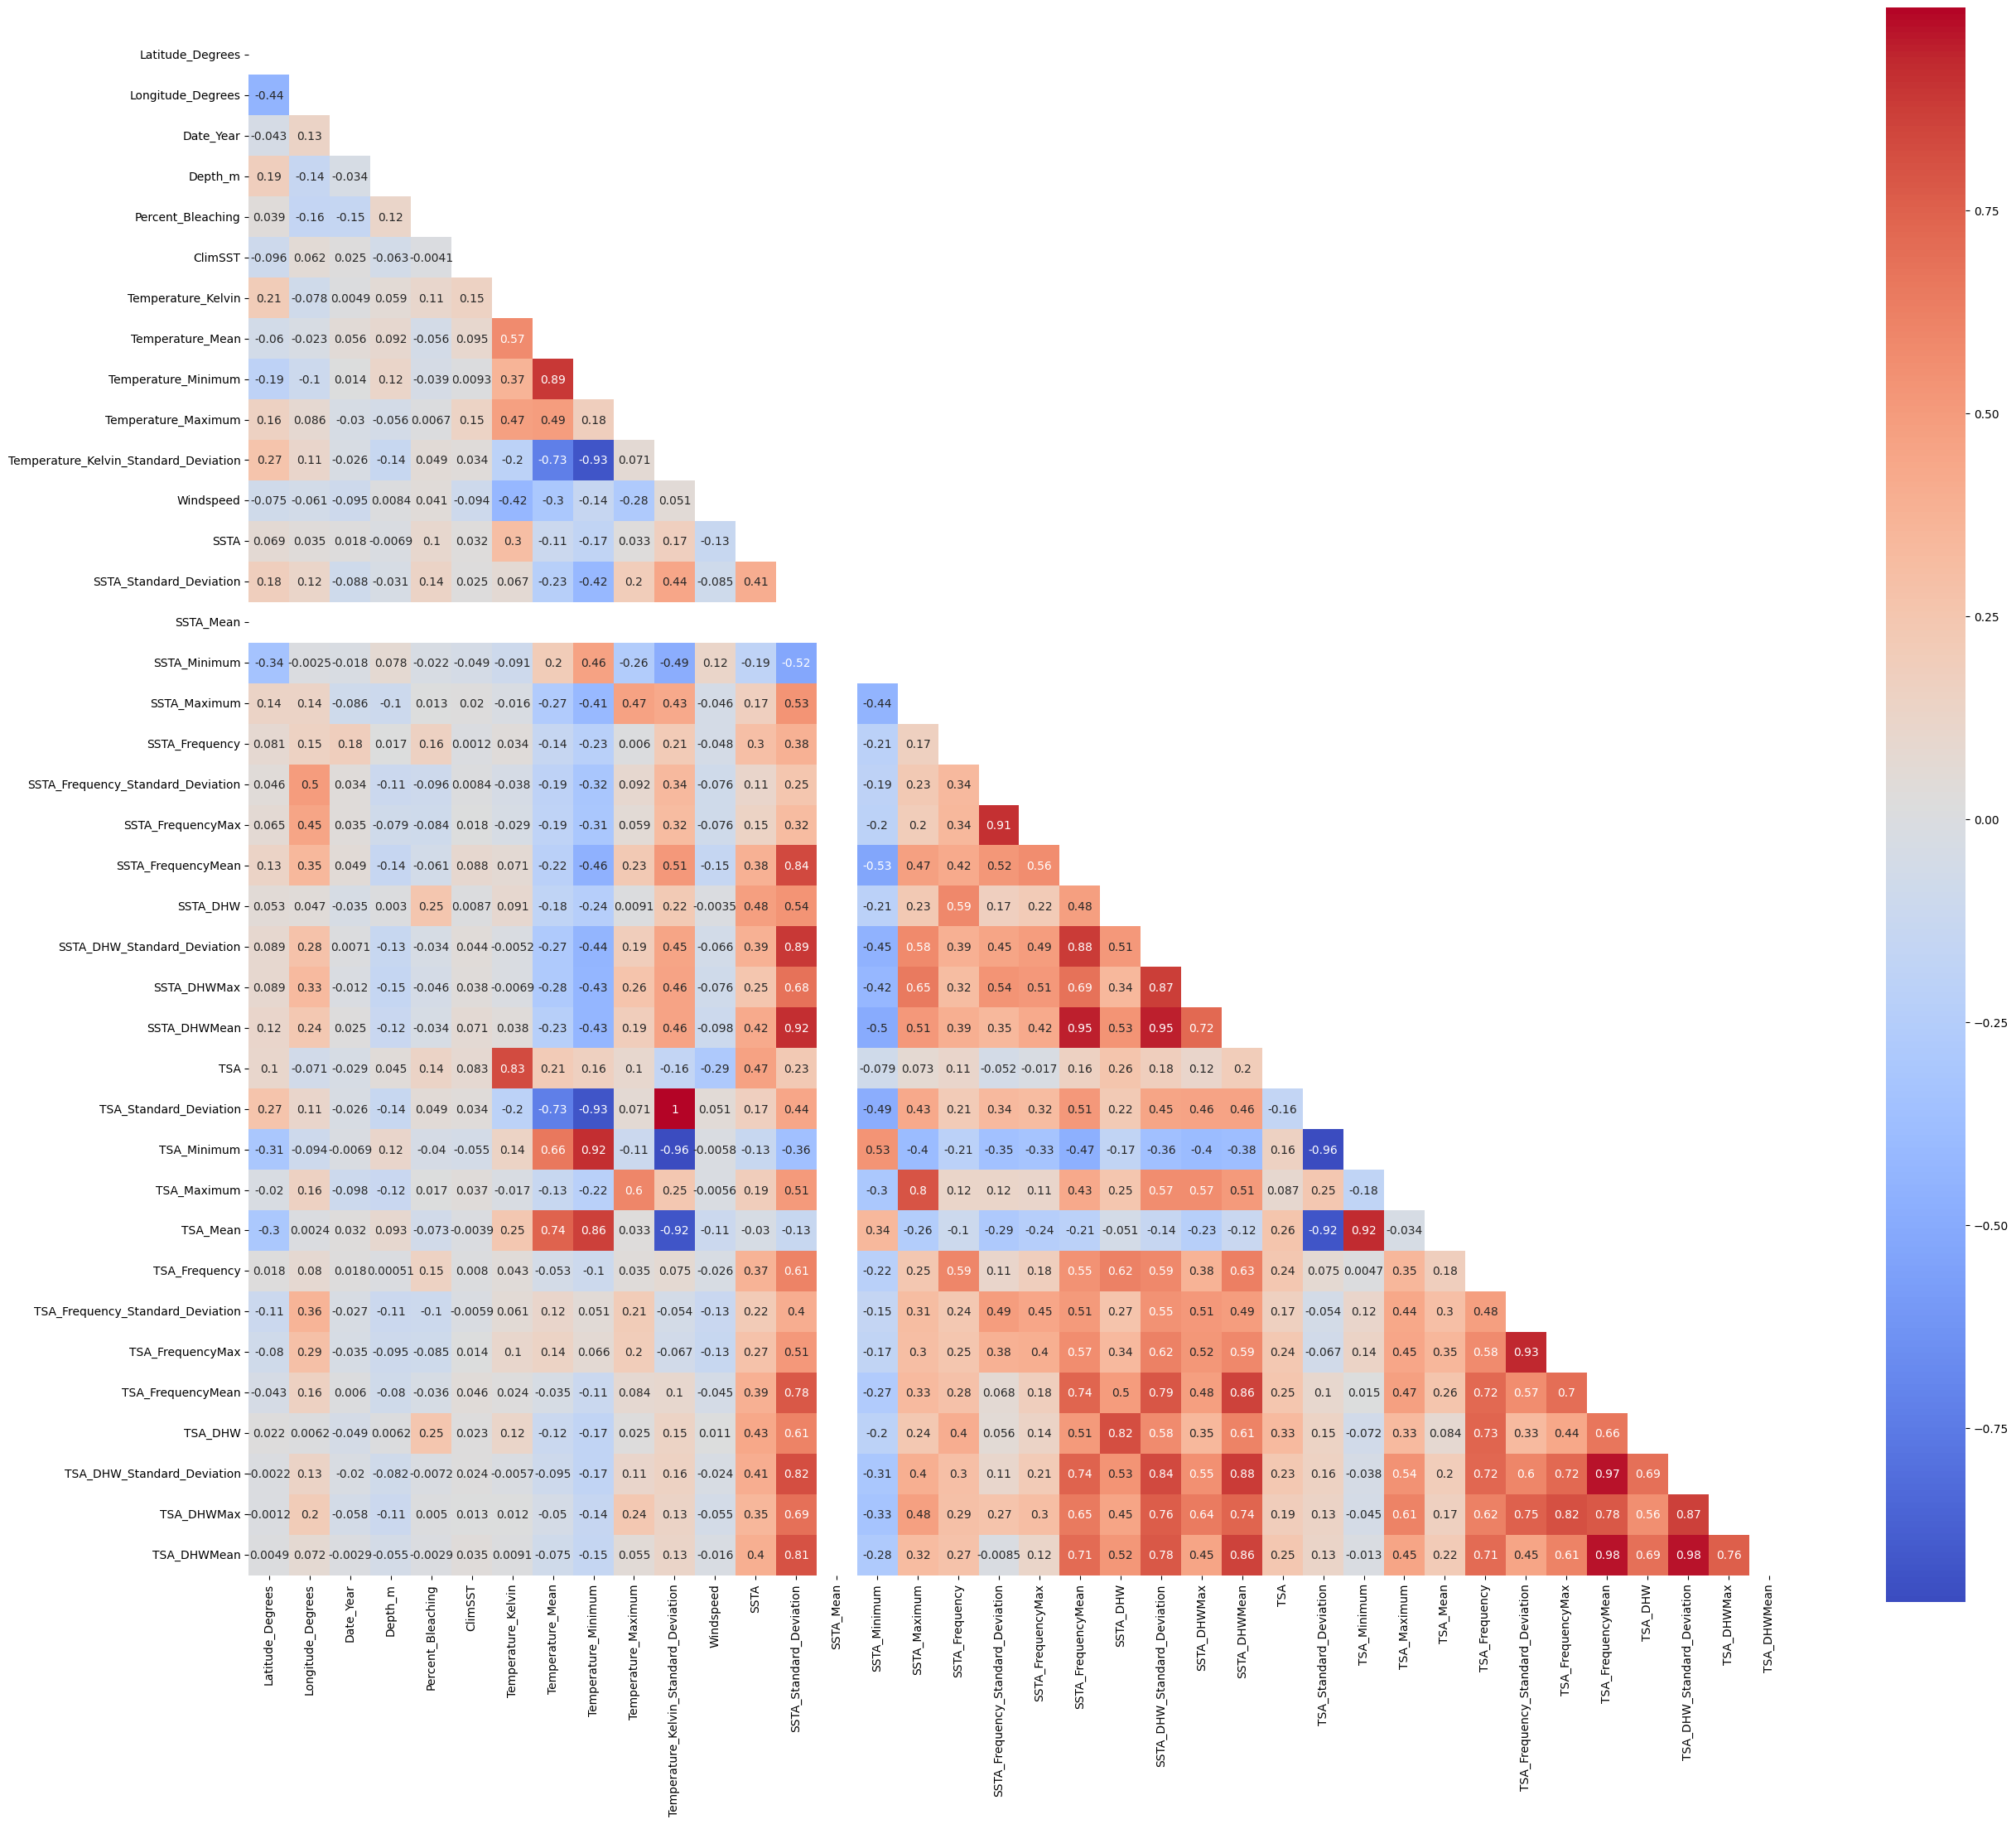

In [71]:
mask = np.triu(np.ones_like(coral_matrix, dtype=bool))
plt.figure(figsize=(30, 25))
sns.heatmap(coral_matrix, mask=mask, annot= True, cmap='coolwarm',square=True)

From this, Heatmap it is determined that SSTA, ClimSST, Depth, Longitude, and Latitude were the
parameters of interest most closely correlated to bleaching,and they were not highly correlated to each other.

In [72]:
import eda_helper_functions

In [73]:
data = coral[["Longitude_Degrees","Latitude_Degrees",'SSTA',"ClimSST","Depth_m","Percent_Bleaching"]]

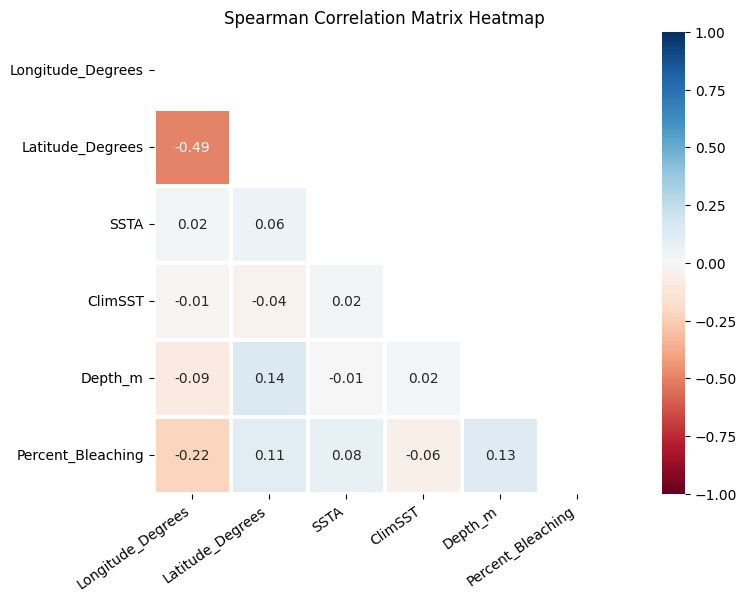

In [75]:
eda_helper_functions.correlation_heatmap(data)

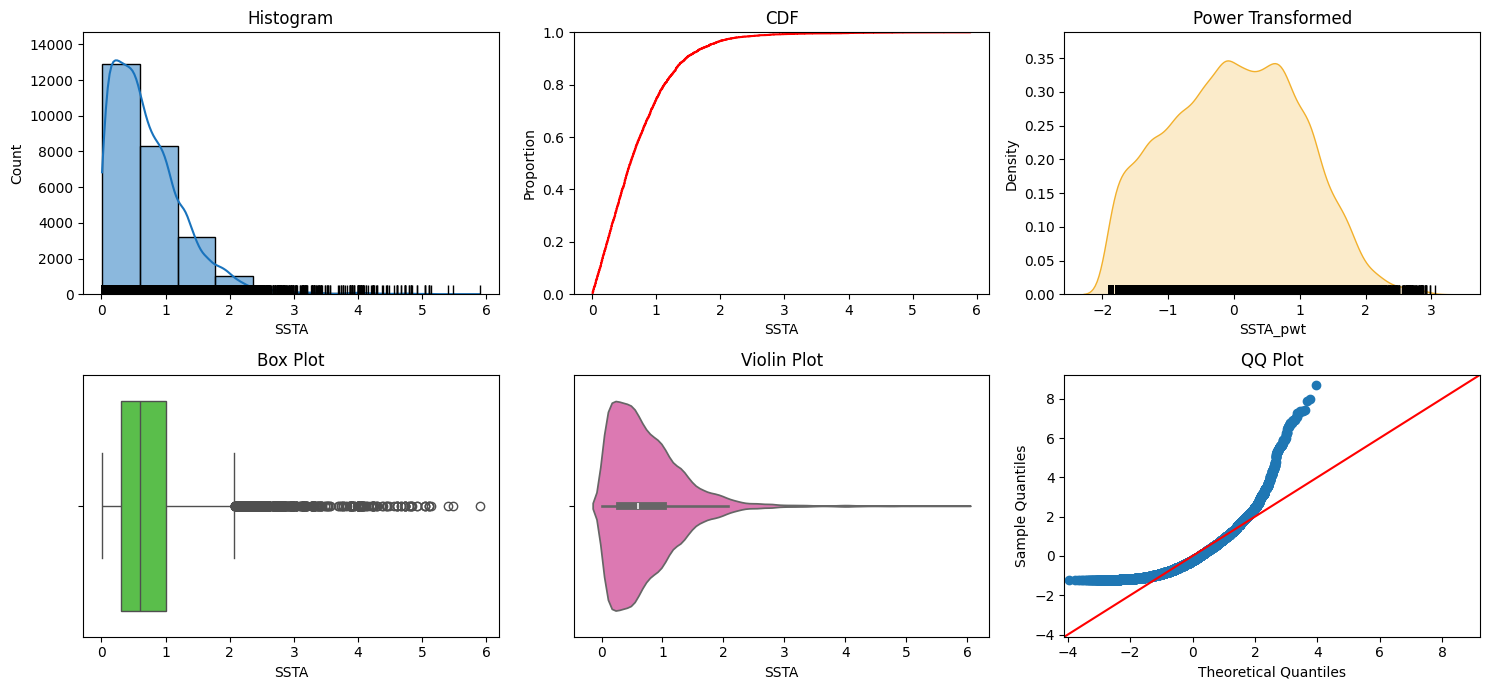

In [76]:
eda_helper_functions.num_univar_plots(data,'SSTA')

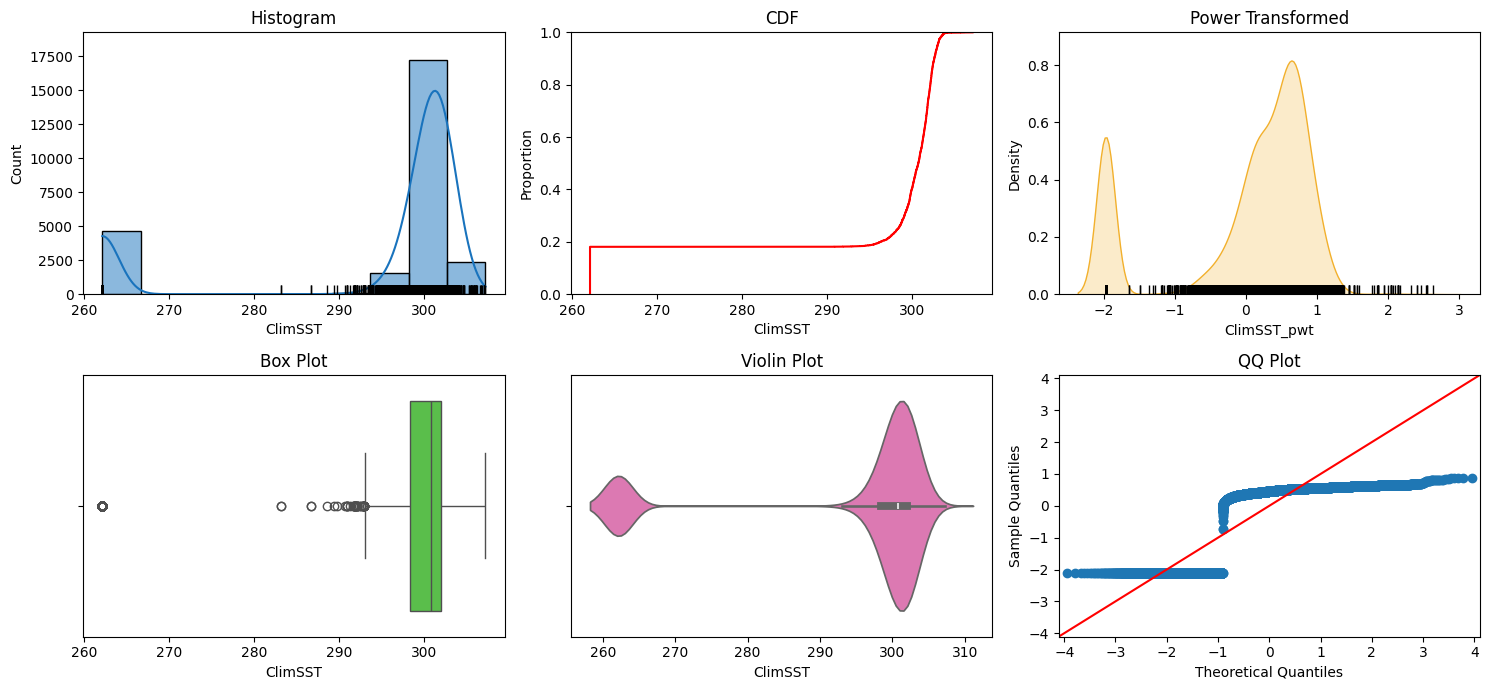

In [77]:
eda_helper_functions.num_univar_plots(data,'ClimSST')

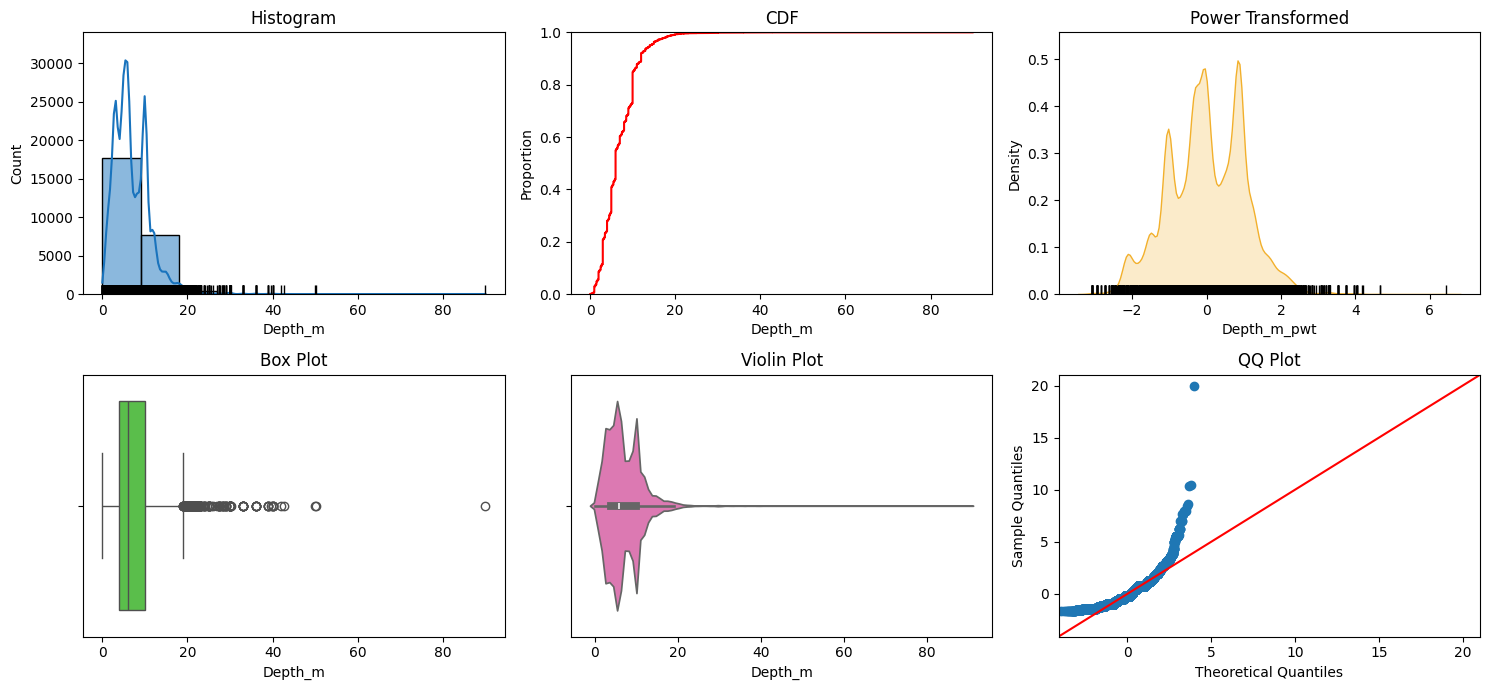

In [78]:
eda_helper_functions.num_univar_plots(data,'Depth_m')

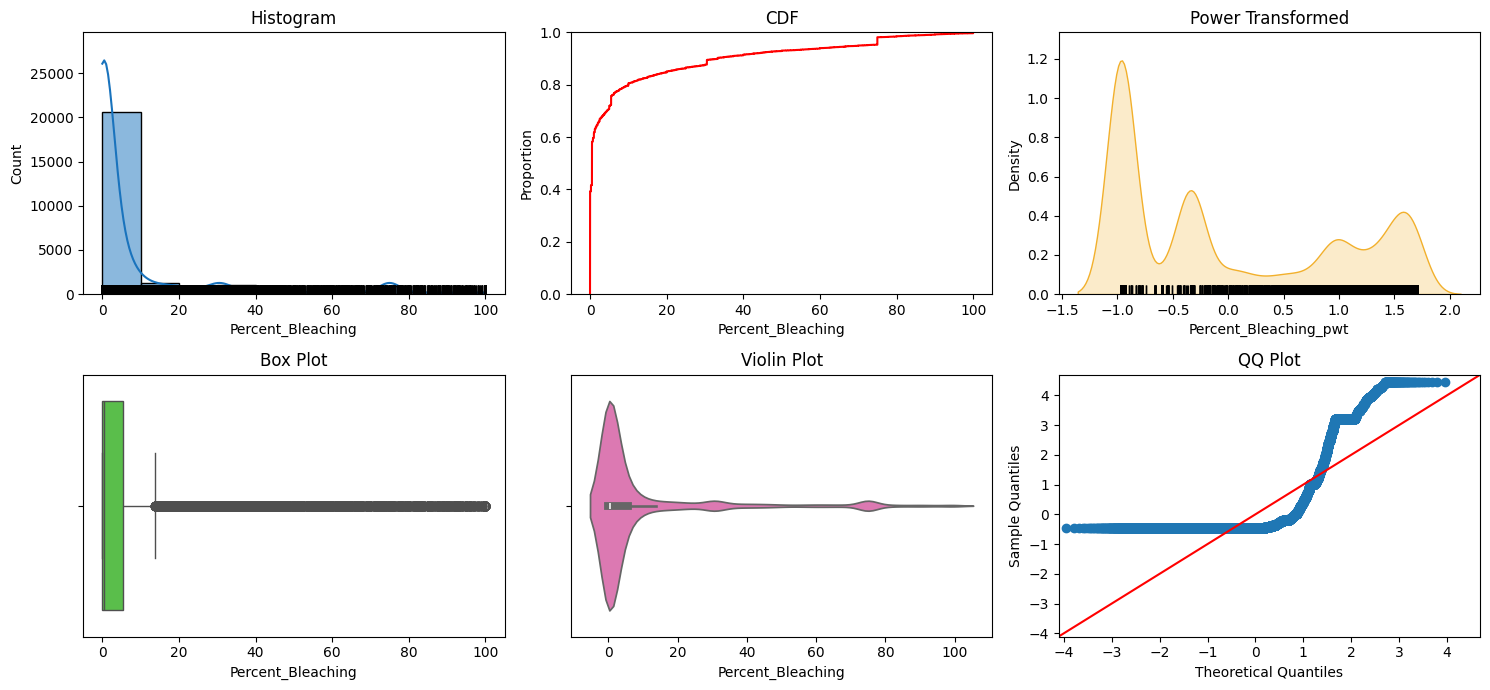

In [79]:
eda_helper_functions.num_univar_plots(data,'Percent_Bleaching')

In [80]:
eda_helper_functions.num_summary(data, "Percent_Bleaching")

1        50.70
2        50.90
5        51.00
6        51.30
7        51.38
         ...  
41351     0.50
41352     0.50
41353     0.50
41357     0.50
41358     0.50
Name: Percent_Bleaching, Length: 25833, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 25,833 / 25,833 rows


,value
percentile,
0,0.0000
5,0.0000
10,0.0000
25,0.0000
50,0.5000
75,5.5000
90,33.3000
95,71.0160
99,87.9648


,value
mean,9.513028
trimmed mean (5%),6.124682
trimmed mean (10%),3.828599
median,0.500000


,value
var,414.465997
std,20.358438
IQR,5.500000
mad,0.500000
coef_variance,2.140059


,value
skewness,2.604347
kurtosis,6.022661


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.3895608542573927e-121
Test Statistic       : 0.5307350782598923
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 5044.253523808475
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


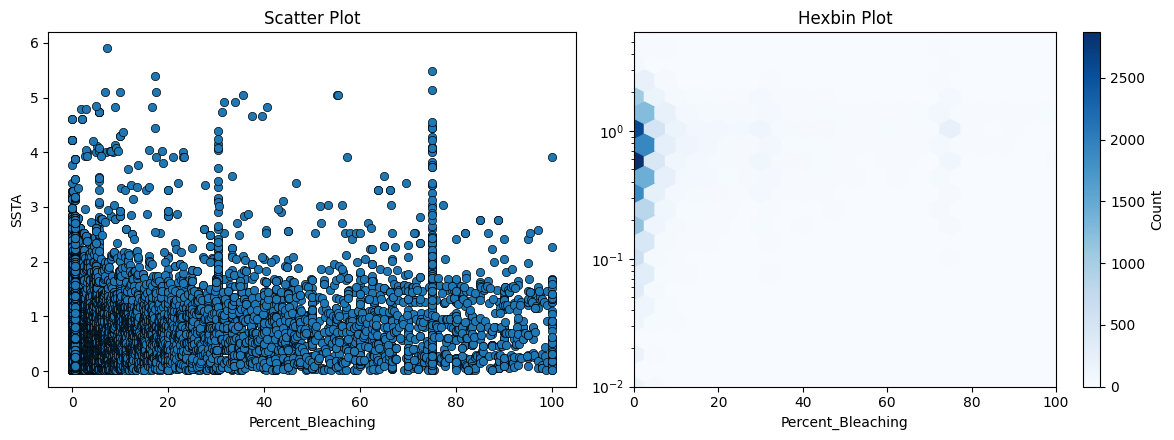

In [81]:
eda_helper_functions.num_bivar_plots(
	data,
	"Percent_Bleaching",
	"SSTA",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)